Khai thác dữ liệu văn bản và ứng dụng - 21CNTThuc

Group 01

|HỌ VÀ TÊN   | MSSV  |
|---|---|
|Bùi Tấn Phương|  20127597 |
|Trần Quốc Trung   |20127655   |
|Hoàng Phước Nguyên   |20127258   |
|Nguyễn Trương Hoàng Thái   |20127625   |

# <div align="center"> **Exploratory Data Analysis**  </div>


## **1** | Import libraries

---


In [ ]:
!pip install underthesea

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.9/20.9 MB 37.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 47.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 657.8/657.8 kB 46.7 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import re
from collections import Counter

import seaborn as sns
import matplotlib.pyplot as plt

from wordcloud import WordCloud

from underthesea import word_tokenize

## **2** | Read data and analyzing

---


### Read data

In [ ]:
# Mount drive and cd to working directory
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd "/content/drive/MyDrive/Colab Notebooks"

/content/drive/MyDrive/Colab Notebooks


In [ ]:
df = pd.read_json('Project1_Data.json')
df.sample(5) # random 5 rows in df

,id,question,title,text,label
17736,u4-1551956282_1,Bác Hồ ra đi tìm đường cứu nước năm bao nhiêu,Ngày Bác Hồ ra đi tìm đường cứu nước,Các hoạt động kỉ niệm diễn ra tại bến cảng Nhà...,False
15706,u1-1554950244_3,Thủ tướng chính phủ của nước VN tên là gì,Chế định Chủ tịch nước Việt Nam,Với Chính phủ: chủ tịch nước đề nghị quốc hội ...,False
11936,u3-1557470442_0,"Trong các đời vua Nguyễn, vua nào ngự ở ngai v...",Tự Đức,"Tự Đức tên khai sinh là Nguyễn Phúc Thì, còn c...",True
5266,u3-1566875506_1,giám đốc công an hiện tại của thành phố Hồ Chí...,Đài Truyền hình Thành phố Hồ Chí Minh,Đài Truyền hình Thành phố Hồ Chí Minh ( tiếng ...,False
5408,u6-1566792142_1,người nào là bí thư thành ủy của thành phố Huế,Thừa Thiên - Huế,Thành phố Huế cách sân bay quốc tế Phú Bài - T...,False


### Analyzing

How many rows and columns of the data?

In [ ]:
print(f'Number of row: {df.shape[0]}\nNumber of column: {df.shape[1]}')

Number of row: 18108
Number of column: 5


#### Rows of the data

Meaning of each row: each row is one sample that identified by the value "id" and provides which given context can answer the question. If the "text" column which is the given context can answer for the information of the "question" column, the "label" will be True and vice versa.

#### Columns of the data

Meaning of each column

| Column name  | Meaning  |
|---|---|
| id  | The identifier for each sample  |
| question  | The text question |
| title  | The general topic for the sample  |
| text  | The given text answer for the question  |
| label  | Boolean value if the text can answer the question or not  |

Data type of columns

In [ ]:
info_dict = {
    'Non-Null Count': df.count(),
    'Data Type': df.dtypes
}

info_df = pd.DataFrame(info_dict)
info_df

,Non-Null Count,Data Type
id,18108,object
question,18108,object
title,18108,object
text,18108,object
label,18108,bool


💬 **Comment:**
- There are `18108` records and `5` attributes.

- There is no missing records in data and no abnormal in data types. However, some samples have logical empty `title` value (their value are ""). Based on the result below, there are 995 samples which have empty title.

In [ ]:
missing_values = df.eq("").sum(axis=0)
missing_values_df = pd.DataFrame(missing_values, columns=['Number of missing value'])
missing_values_df

,Number of missing value
id,0
question,0
title,995
text,0
label,0


In [ ]:
# Data preprocessing:
df[df['title']==""]

,id,question,title,text,label
22,u5-1570381939_0,Đế quốc Mông Cổ tồn tại khoảng thời gian nào,,Đế quốc Mông Cổ (tiếng Mông Cổ: Монголын эзэнт...,True
37,u5-1570381734_0,Bangladesh có diện tích đứng thứ mấy thế giới,,Dân số Bangladesh xếp hạng thứ bảy trên thế gi...,True
43,u5-1570381646_0,Tôn Trung Sơn là ai,,"Tôn Trung Sơn, nguyên danh là Tôn Văn, tự Tải ...",True
55,u5-1570381394_0,Iran nằm ở khu vực nào,,Iran (tiếng Ba Tư: ایران‎ Irān [ʔiːˈɾɒːn] (ngh...,True
85,u5-1570380924_0,Giáo hoàng là ai,,"Giáo hoàng là vị giám mục của Giáo phận Rôma, ...",True
...,...,...,...,...,...
13053,u3-1557223614_0,Ở thủ đô Hà Nội có tất cả bao nhiêu Quận,,Sau đợt mở rộng địa giới hành chính vào tháng ...,True
13058,u8-1557223614_0,Việt Nam hiện tại có bao nhiêu tỉnh và thành phố,,Việt Nam có 63 tỉnh thành phố trực thuộc Trung...,True
13061,u3-1557223454_0,Một ván cờ vua mỗi bên có bao nhiêu quân,,"Cờ vua (tên tiếng Anh: Chess), trước kia còn đ...",True
13091,u8-1557222362_0,Cách mạng tháng 10 Nga diễn ra vào năm nào,,Cách mạng Tháng Mười nổ ra vào ngày 24 tháng 1...,True


#### Check for duplication

In [ ]:
df[df.duplicated()]

,id,question,title,text,label
6294,u8-1560855262_1,Thủ lĩnh của cuộc khởi nghĩa Yên Thế là ai,Khu di tích khởi nghĩa Yên Thế,"Năm 1984, nhân dịp kỷ niện 100 năm khởi nghĩa ...",True


There is one duplicate row with the id *u8-1560855262_1*.

In [ ]:
unique_counts = df.nunique()
unique_counts_df = pd.DataFrame(unique_counts, columns=['Unique values'])
unique_counts_df

,Unique values
id,18107
question,5070
title,9457
text,15957
label,2


💬 **Comment:**
- There are total `5070` questions over `18107` records. It mean on average, each question is repeated more than 3 times.

- Same `question` can have different `title` and `text`

## **3** | Pre-processing data

---


* This pre-processing is a simple version for the following Exploratory Data Analysis. It contains: removing duplicate rows, removing rows which have empty title.
* Different embedding methods will have the appropriate data pre-processing.

In [ ]:
# Remove duplicate rows
df = df.drop_duplicates()
# Remove sample which empty title
df = df[df['title'] != '']

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17112 entries, 0 to 18107
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        17112 non-null  object
 1   question  17112 non-null  object
 2   title     17112 non-null  object
 3   text      17112 non-null  object
 4   label     17112 non-null  bool  
dtypes: bool(1), object(4)
memory usage: 685.1+ KB


## **4** | Exploratory Data Analysis

---


###  Maximum and minimum lengths of the question & context:

In [ ]:
df['question_len'] = df['question'].str.len()
df['text_len'] = df['text'].str.len()

In [ ]:
create = {
    'Column': ['question_len', 'text_len'],
    'Maximum Length': [df['question_len'].max(), df['text_len'].max()],
    'Minimum Length': [df['question_len'].min(), df['text_len'].min()]
}

length_summary_df = pd.DataFrame(create)
length_summary_df

,Column,Maximum Length,Minimum Length
0,question_len,152,7
1,text_len,2609,4


**COMMENT**: The maximum length of a question is 152, and the minimum is 7. In terms of text, the maximum length is 2609, and the minimum is 4.



### Question length distribution & text length distribution

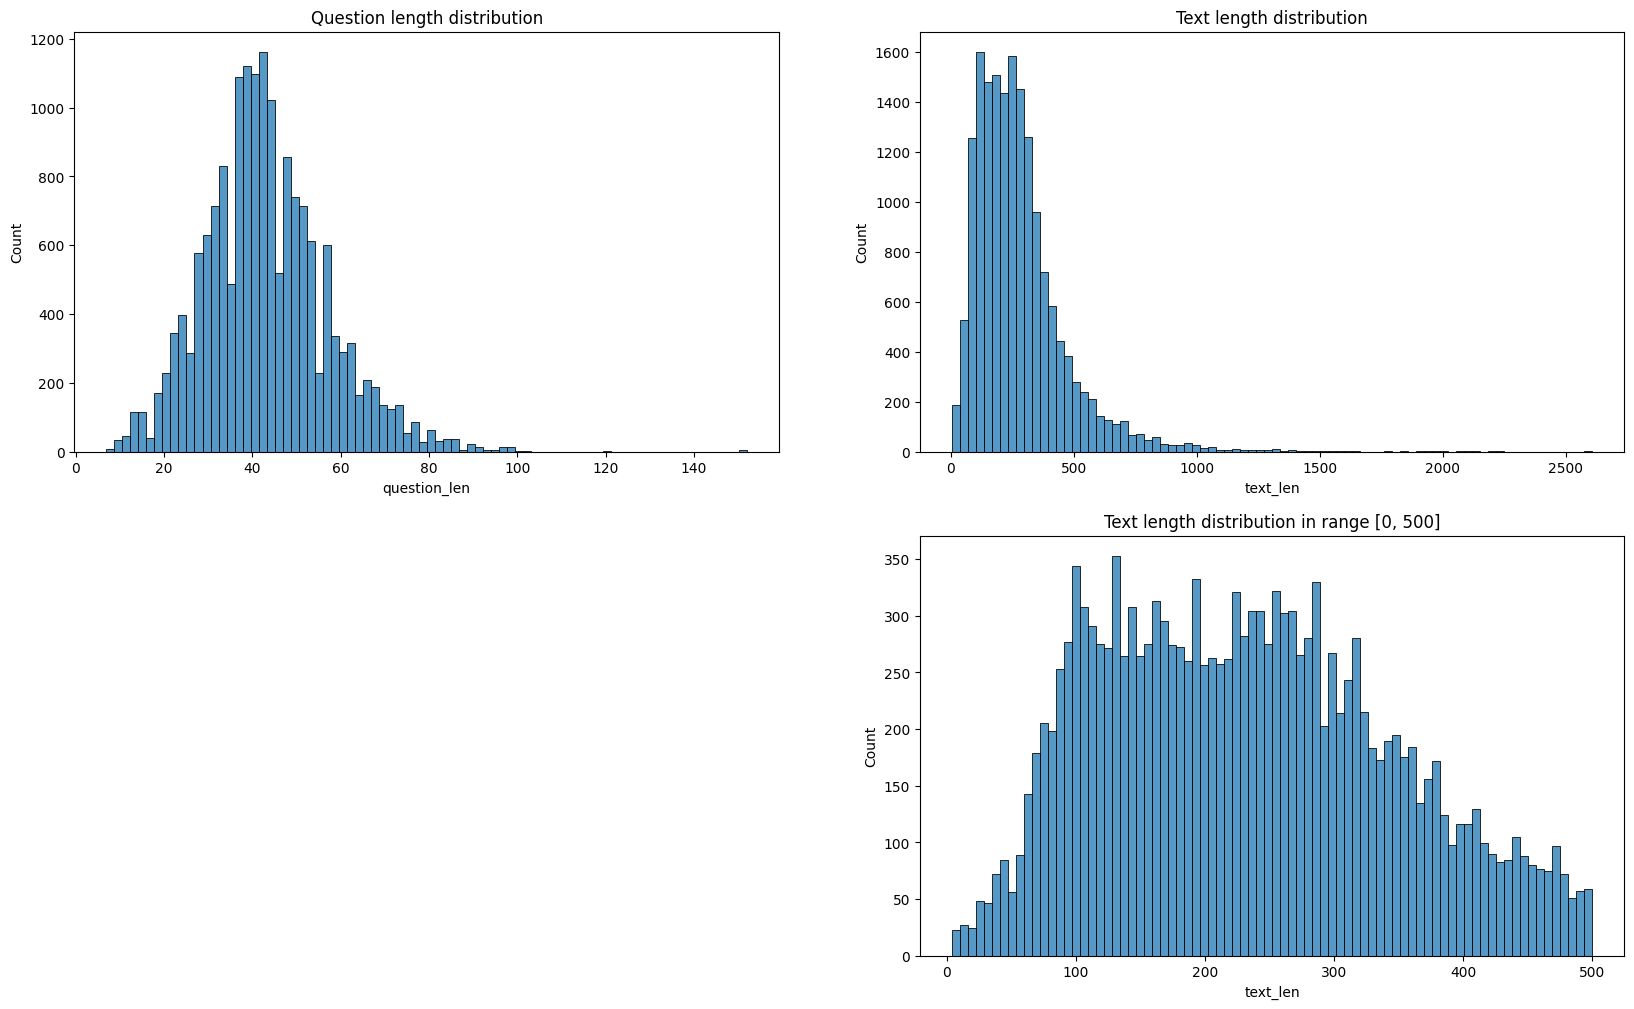

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(20,12))

#question len distribution histogram
sns.histplot(ax=axes[0][0], data=df, x="question_len", bins=80)

#text len distribution histogram
sns.histplot(ax=axes[0][1], data=df, x="text_len", bins=80)

#text len distribution in range [0 - 500] histogram
sns.histplot(ax=axes[1][1], data=df[df['text_len'] < 501], x="text_len", bins=80)

sns.set_style("whitegrid")
axes[0][0].set_title("Question length distribution")
axes[0][1].set_title("Text length distribution")
axes[1][1].set_title("Text length distribution in range [0, 500]")

fig.delaxes(axes[1, 0]) #remove chart [1, 0]

plt.show()

In [ ]:
print('Min of text length is', df['text_len'].min())

Min of text length is 4


**COMMENT**

- Question length mostly ranges from 20 to 60
- There are some questions having a length of 120 and more than 140
- Context length mostly ranges from 4 to 500
- A few contexts have under 100 length. It means that the question length can greater than the context length
- In general, the generality contexts have great length, maybe they contain enough information to answer question

In [ ]:
#Create data frame store comparation between question length and text length
index_question_lesser = df["question_len"] < df["text_len"]
df_len_question_lesser = df[index_question_lesser]
df_len_text_lesser = df[~index_question_lesser]

data_compare = {
    "label": ["Question length greater its context length", "Question length lesser its context length"],
    "value": [len(df_len_text_lesser), len(df_len_question_lesser)]
}

df_compare = pd.DataFrame(data_compare)
df_compare

,label,value
0,Question length greater its context length,292
1,Question length lesser its context length,16820


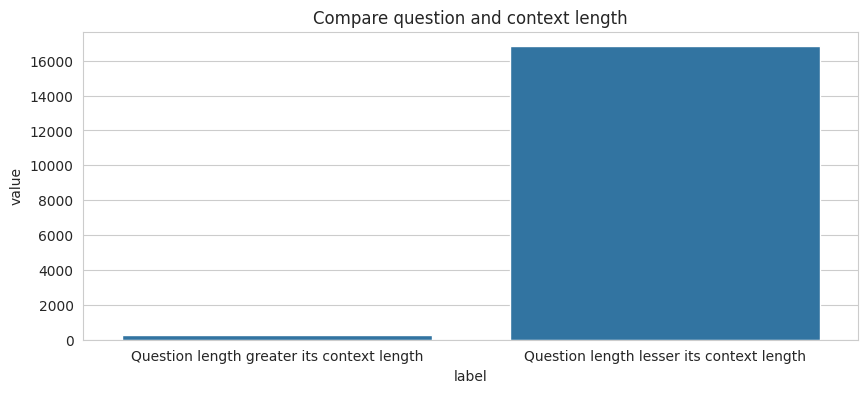

In [ ]:
plt.figure(figsize=(10, 4))

sns.barplot(x='label', y='value', data=df_compare)

plt.title("Compare question and context length")
plt.show()

**COMMENT**

- As above analysis, some questions lesser than its context length. But the ratio is not high


### Label distribution

In [ ]:
a = df['label'].value_counts()

sns.set_style("whitegrid")

plt.figure(figsize=(10,5))
plt.pie(a, labels=["False", "True"],autopct='%1.1f%%')

plt.title("Label distribution")
plt.show()

**COMMENT**
- The ratio of `false` and `true` approximately 7:3. Due to this imbalanced, we need some method to handle this.

### Question repeat distribution

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))
question_count = df['question'].value_counts()
text_count = df['text'].value_counts()

question_repeatition = pd.DataFrame({'Number of repititions': question_count})
text_repeatition = pd.DataFrame({'Number of repititions': text_count})

sns.set_style("whitegrid")
sns.countplot(question_repeatition, x="Number of repititions",ax=axes[0])
sns.countplot(text_repeatition, x="Number of repititions",ax=axes[1])

axes[0].set_title("Question repeat distribution")
axes[1].set_title("Context repeat distribution")

plt.show()

**COMMENT**
- Question repeat mostly in 1-6 times
- A little bit of them repeat more than 7 times
- Context repeat mostly in 1-2 times

### Word frequency in question

In [ ]:
words = []

for question in df['question']:
  questions = str(question).split(' ')
  words.extend(questions)
all_word = ' '.join(words)

In [ ]:
# Tokenization questions
questions = [word_tokenize(ques) for ques in df['question'].unique()]
questions = [word.replace(" ", "_") for sublist in questions for word in sublist] #Flatten 2D list
questions[:7]


In [ ]:
all_words = " ".join(questions)
wordcould = WordCloud(background_color="black", max_words=20, max_font_size=70, collocations = False).generate(all_words)
sns.set_style("white")
plt.imshow(wordcould)
plt.title("Word frequency in question", size = 18)
plt.axis("off")
plt.show()

**COMMENT**
- Most frequent word are `nào`, `của`, `là`, `gì` which representing for question word in Vietnamese

### Frequent special character in context

In [ ]:
# Tokenization texts
context = [word_tokenize(ques) for ques in df['text'].unique()]
context = [word for sublist in context for word in sublist] #Flatten 2D list

In [ ]:
#find all special characters using regex
pattern = r'[^\w\s]'
special_characters = re.findall(pattern, " ".join(context))

In [ ]:
character_counts = Counter(special_characters)

df = pd.DataFrame.from_dict(character_counts, orient='index').reset_index()
df.columns = ['Character', 'Count']

print(len(df))
sns.set_style("whitegrid")
sns.barplot(x='Count', y='Character', data=df.nlargest(10, 'Count'))

plt.title('Ten special characters appear the most')

plt.show()

**COMMENT**
- Punctuation and colon is the most common character

### Word frequency in context

In [ ]:
#exclude special character
unique_characters = set(special_characters)
word_in_context = [word for word in context if word not in unique_characters]

In [ ]:
word_counts = Counter(word_in_context)

df = pd.DataFrame.from_dict(word_counts, orient='index').reset_index()
df.columns = ['Word', 'Count']

sns.set_style("whitegrid")
sns.barplot(x='Count', y='Word', data=df.nlargest(25, 'Count'))

plt.title('The 25 most frequent words')
plt.ylabel('')
plt.show()

**COMMENT**
- The majority of words are linking verbs like `là`, `và`, `của`, ...
- We also see some regularly occurred noun `Việt Nam`, `tháng`, `nước`
